<a href="https://colab.research.google.com/github/Swarno-Coder/SweetCode/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.ToTensor()
#transform = transforms.Compose(
#        [transforms.ToTensor(),
 #       transforms.Normalize((0.5), (0.5))]
 #   )

mnist_data = datasets.MNIST(root = './data', train = True, download = True, transform = transform)

data_loader = torch.utils.data.DataLoader(dataset = mnist_data, batch_size = 64, shuffle = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
dataiter = iter(data_loader)
images, labels = dataiter.next()
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        # N, 784
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear((28*28), 128), # _n
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3) # -> N, 3
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12), # _n
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid() # -> N, 3
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    


In [5]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [17]:
num_epochs = 10
outputs = []
for epoch in range(num_epochs):
    for (imgs, _) in data_loader:
        imgs = imgs.reshape(-1, 28*28)
        recon = model(imgs)
        loss = criterion(recon, imgs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, imgs, recon))

Epoch:1, Loss:0.0320
Epoch:2, Loss:0.0369
Epoch:3, Loss:0.0329
Epoch:4, Loss:0.0312
Epoch:5, Loss:0.0358
Epoch:6, Loss:0.0336
Epoch:7, Loss:0.0323
Epoch:8, Loss:0.0287
Epoch:9, Loss:0.0356
Epoch:10, Loss:0.0349


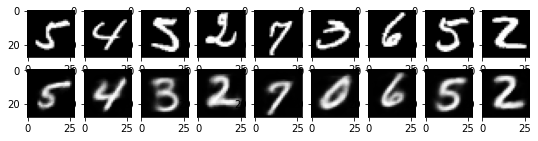

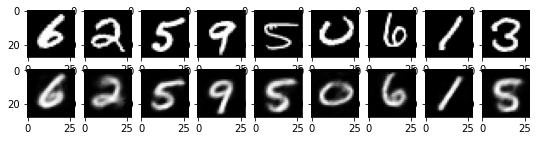

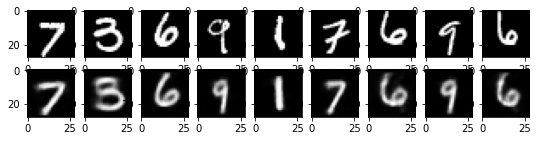

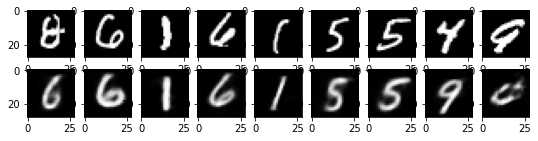

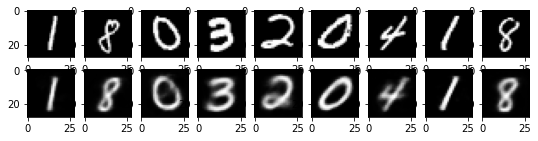

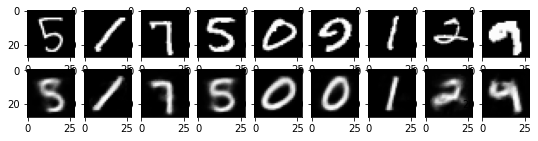

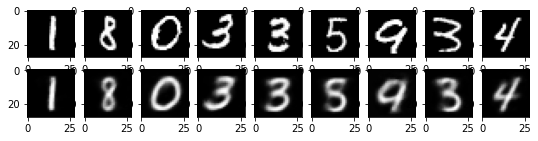

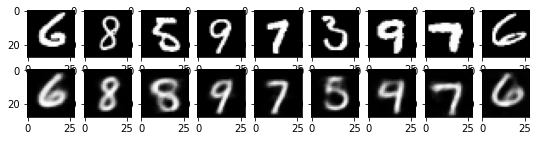

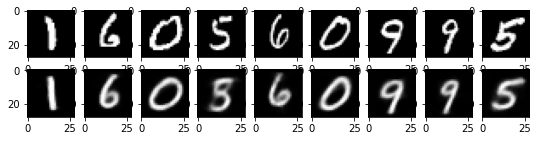

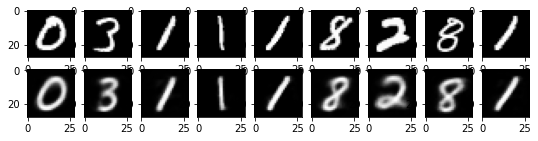

In [57]:
for k in range(0, num_epochs):
  plt.figure(figsize=(9, 2))
  plt.gray()
  imges = outputs[k][1].detach().numpy()
  recon = outputs[k][2].detach().numpy()
  for i, item in enumerate(imges):
    if i >= 9: break
    plt.subplot(2, 9, i+1)
    item = item.reshape(-1, 28,28)
    plt.imshow(item[0])

  for i, item in enumerate(recon):
    if i >= 9: break
    plt.subplot(2, 9, 9+i+1)
    item = item.reshape(-1, 28,28)
    plt.imshow(item[0])